# Import Packages

In [1]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from math import sqrt
from statistics import mean
from sklearn.metrics import r2_score,mean_squared_error

# Data for ANN

In [17]:
x_train=pd.read_csv('x_train_3.csv')
y_train=pd.read_csv('y_train_3.csv')
x_test=pd.read_csv('x_test_3.csv')
y_test=pd.read_csv('y_test_3.csv')

In [18]:
x_train.head()

,Unnamed: 0,i,ii,v2
0,0,0.059091,-0.049677,0.052259
1,1,0.066293,-0.052948,0.048294
2,2,0.072327,-0.055901,0.044217
3,3,0.076289,-0.058298,0.039935
4,4,0.077742,-0.060031,0.035389


In [19]:
x_train=x_train[['i','ii','v2']]
x_train

,i,ii,v2
0,0.059091,-0.049677,0.052259
1,0.066293,-0.052948,0.048294
2,0.072327,-0.055901,0.044217
3,0.076289,-0.058298,0.039935
4,0.077742,-0.060031,0.035389
...,...,...,...
2399995,0.016310,-0.079864,0.257624
2399996,0.006237,-0.085582,0.246488
2399997,-0.002097,-0.091581,0.237009
2399998,-0.007924,-0.096999,0.229297


In [20]:
x_test=x_test[['i','ii','v2']]
x_test

,i,ii,v2
0,-0.028925,0.093669,-0.108403
1,-0.019101,0.107135,-0.093574
2,-0.009049,0.121814,-0.078456
3,0.001363,0.138575,-0.062818
4,0.012087,0.157683,-0.046544
...,...,...,...
599995,-0.071941,-0.122982,-0.096969
599996,-0.072800,-0.124247,-0.098495
599997,-0.073780,-0.124088,-0.100305
599998,-0.074858,-0.122511,-0.102141


In [21]:
y_train

,Unnamed: 0,v1,v3,v4,v5,v6,iii
0,0,0.008806,0.020865,-0.001003,-0.031425,-0.045720,-0.109800
1,1,0.006531,0.018781,-0.003726,-0.034163,-0.047625,-0.120317
2,2,0.004191,0.016538,-0.006406,-0.036766,-0.049445,-0.129346
3,3,0.001736,0.014033,-0.009009,-0.039114,-0.051129,-0.135745
4,4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688,-0.138962
...,...,...,...,...,...,...,...
2399995,29995,0.058704,0.135583,0.028944,-0.035600,-0.071214,-0.099366
2399996,29996,0.054980,0.126710,0.022586,-0.039259,-0.075179,-0.095010
2399997,29997,0.053631,0.119856,0.019416,-0.040403,-0.076902,-0.092667
2399998,29998,0.054703,0.115141,0.019543,-0.038887,-0.076161,-0.092255


In [22]:
y_train=y_train[['v1','v3','v4','v5','v6']]
y_train

,v1,v3,v4,v5,v6
0,0.008806,0.020865,-0.001003,-0.031425,-0.045720
1,0.006531,0.018781,-0.003726,-0.034163,-0.047625
2,0.004191,0.016538,-0.006406,-0.036766,-0.049445
3,0.001736,0.014033,-0.009009,-0.039114,-0.051129
4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688
...,...,...,...,...,...
2399995,0.058704,0.135583,0.028944,-0.035600,-0.071214
2399996,0.054980,0.126710,0.022586,-0.039259,-0.075179
2399997,0.053631,0.119856,0.019416,-0.040403,-0.076902
2399998,0.054703,0.115141,0.019543,-0.038887,-0.076161


In [23]:
y_test

,Unnamed: 0,v1,v3,v4,v5,v6,iii
0,0,-0.029438,-0.082027,-0.068431,-0.029733,-0.003349,0.116164
1,1,-0.044847,-0.065392,-0.056687,-0.020393,0.007857,0.119687
2,2,-0.060703,-0.048238,-0.043725,-0.009981,0.019319,0.124200
3,3,-0.077202,-0.030193,-0.028662,0.002287,0.031176,0.130449
4,4,-0.094126,-0.011143,-0.011190,0.016702,0.043375,0.138749
...,...,...,...,...,...,...,...
599995,29995,-0.009096,-0.165192,-0.213824,-0.149072,-0.080498,-0.046266
599996,29996,-0.009847,-0.167552,-0.215109,-0.149668,-0.081404,-0.046622
599997,29997,-0.010618,-0.169943,-0.216282,-0.149905,-0.082291,-0.045457
599998,29998,-0.011298,-0.171951,-0.217007,-0.149772,-0.083113,-0.042800


In [24]:
y_test=y_test[['v1','v3','v4','v5','v6']]
y_test

,v1,v3,v4,v5,v6
0,-0.029438,-0.082027,-0.068431,-0.029733,-0.003349
1,-0.044847,-0.065392,-0.056687,-0.020393,0.007857
2,-0.060703,-0.048238,-0.043725,-0.009981,0.019319
3,-0.077202,-0.030193,-0.028662,0.002287,0.031176
4,-0.094126,-0.011143,-0.011190,0.016702,0.043375
...,...,...,...,...,...
599995,-0.009096,-0.165192,-0.213824,-0.149072,-0.080498
599996,-0.009847,-0.167552,-0.215109,-0.149668,-0.081404
599997,-0.010618,-0.169943,-0.216282,-0.149905,-0.082291
599998,-0.011298,-0.171951,-0.217007,-0.149772,-0.083113


# **ANN by MLP**

Define a function that will create a 50 ANNs that will predict a given lead from the I, II and V2 leads. These ANNs will each have a single hidden layer with 15 neurons and use a logistic sigmoid activation function in the hidden layer. The correlation coefficient and RMSE calculated on the test data will be the performance measures. The average r and RMSE will be the overall socre for that lead.

In [29]:
# Function for running ANN (single layer MLP regressor) 50 times
def ANN_for_ECG(x_train,y_train,x_test,y_test):

    v1_correlation_all = [] #list of correlation coefficient of v1 of each iteration
    v3_correlation_all = [] #list of correlation coefficient of v3 of each iteration
    v4_correlation_all = [] #list of correlation coefficient of v4 of each iteration
    v5_correlation_all = [] #list of correlation coefficient of v5 of each iteration
    v6_correlation_all = [] #list of correlation coefficient of v6 of each iteration

    v1_rmse_all=[] #list of RMSE  of v1 of each iteration
    v2_rmse_all=[] #list of RMSE  of v2 of each iteration
    v3_rmse_all=[] #list of RMSE  of v3 of each iteration
    v4_rmse_all=[] #list of RMSE  of v4 of each iteration
    v5_rmse_all=[] #list of RMSE  of v5 of each iteration
    v6_rmse_all=[] #list of RMSE  of v6 of each iteration

    for i in range(750,800):
            model = MLPRegressor(random_state=i,hidden_layer_sizes=(15,), activation='logistic').fit(x_train,y_train)
            y_pred=model.predict(x_test)
            y_pred=pd.DataFrame(y_pred,columns=['v1_pred','v3_pred','v4_pred','v5_pred','v6_pred'])
            
            
            r_v1=sqrt(r2_score(y_test[['v1']],y_pred[['v1_pred']]))
            rmse_v1=sqrt(mean_squared_error(y_test[['v1']],y_pred[['v1_pred']]))
            v1_correlation_all.append(r_v1)
            v1_rmse_all.append(rmse_v1)

            r_v3=sqrt(r2_score(y_test[['v3']],y_pred[['v3_pred']]))
            rmse_v3=sqrt(mean_squared_error(y_test[['v3']],y_pred[['v3_pred']]))
            v3_correlation_all.append(r_v3)
            v3_rmse_all.append(rmse_v3)

            r_v4=sqrt(r2_score(y_test[['v4']],y_pred[['v4_pred']]))
            rmse_v4=sqrt(mean_squared_error(y_test[['v4']],y_pred[['v4_pred']]))
            v4_correlation_all.append(r_v4)
            v4_rmse_all.append(rmse_v4)


            r_v5=sqrt(r2_score(y_test[['v5']],y_pred[['v5_pred']]))
            rmse_v5=sqrt(mean_squared_error(y_test[['v5']],y_pred[['v5_pred']]))
            v5_correlation_all.append(r_v5)
            v5_rmse_all.append(rmse_v5)

            r_v6=sqrt(r2_score(y_test[['v6']],y_pred[['v6_pred']]))
            rmse_v6=sqrt(mean_squared_error(y_test[['v6']],y_pred[['v6_pred']]))
            v6_correlation_all.append(r_v6)
            v6_rmse_all.append(rmse_v6)

    v1_corr=round(mean(v1_correlation_all),3)
    v3_corr=round(mean(v3_correlation_all),3)
    v4_corr=round(mean(v4_correlation_all),3)
    v5_corr=round(mean(v5_correlation_all),3)
    v6_corr=round(mean(v6_correlation_all),3)

    correlation_coeff={'v1':v1_corr,'v3':v3_corr,'v4':v4_corr,'v5':v5_corr,'v6':v6_corr}

    v1_rmse=round(mean(v1_rmse_all),3)
    v3_rmse=round(mean(v3_rmse_all),3)
    v4_rmse=round(mean(v4_rmse_all),3)
    v5_rmse=round(mean(v5_rmse_all),3)
    v6_rmse=round(mean(v6_rmse_all),3)

    RMSE={'v1':v1_rmse,'v3':v3_rmse,'v4':v4_rmse,'v5':v5_rmse,'v6':v6_rmse}

    return print('correlation_coeff: ' ,correlation_coeff,  'RMSE: ',RMSE)



In [30]:
%%time
ANN_results = ANN_for_ECG(x_train,y_train,x_test,y_test)

correlation_coeff:  {'v1': 0.905, 'v3': 0.941, 'v4': 0.787, 'v5': 0.842, 'v6': 0.884} RMSE:  {'v1': 0.091, 'v3': 0.099, 'v4': 0.14, 'v5': 0.099, 'v6': 0.071}
Wall time: 47min 46s


### **ANN visualization**

In [11]:
# Running the model once and making prediction for visualization
model = MLPRegressor(hidden_layer_sizes=(15,), activation='logistic').fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['v1_pred','v3_pred','v4_pred','v5_pred','v6_pred'])

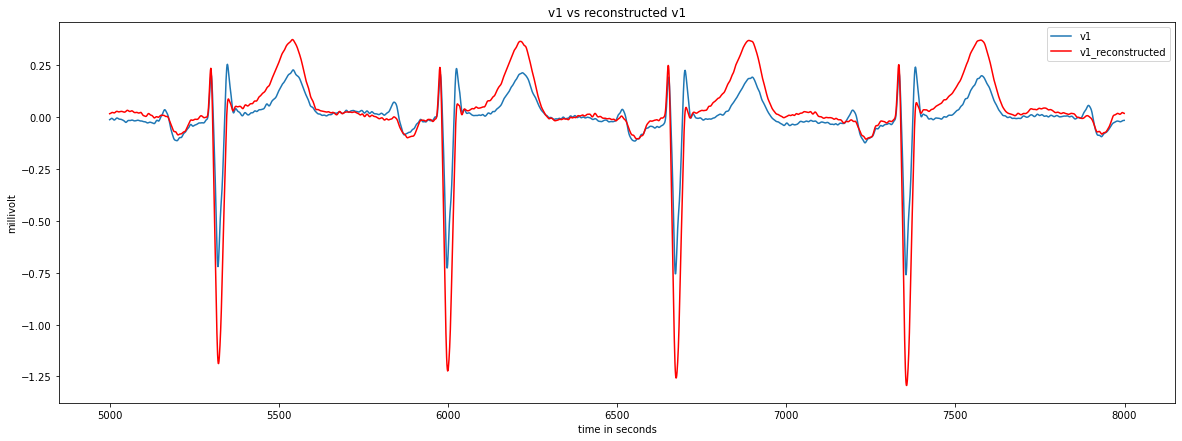

In [12]:
#v1
plt.figure(figsize=(20,7))
plt.plot(y_test['v1'][5000:8000],label="v1")
plt.plot(y_pred['v1_pred'][5000:8000],'r',label='v1_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v1 vs reconstructed v1')
plt.legend()

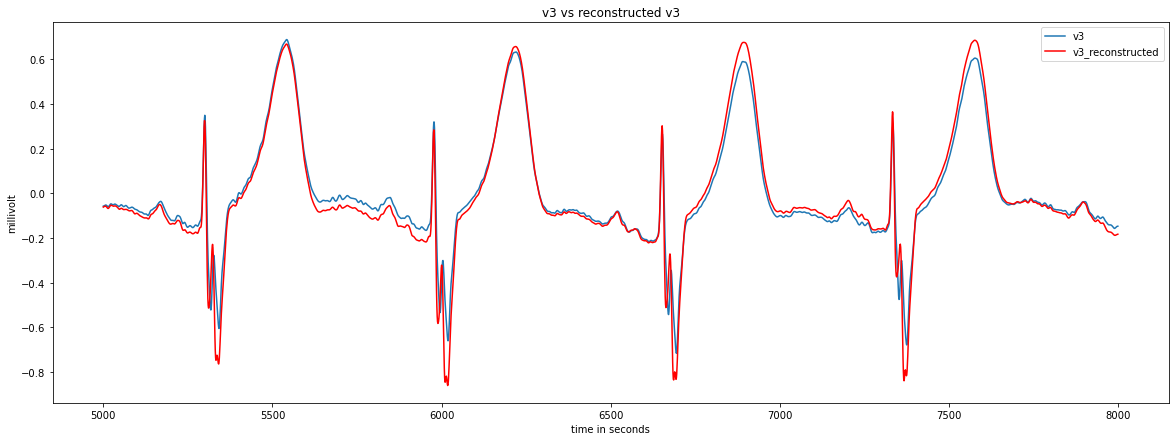

In [13]:
#v3
plt.figure(figsize=(20,7))
plt.plot(y_test['v3'][5000:8000],label="v3")
plt.plot(y_pred['v3_pred'][5000:8000],'r',label='v3_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v3 vs reconstructed v3')
plt.legend()

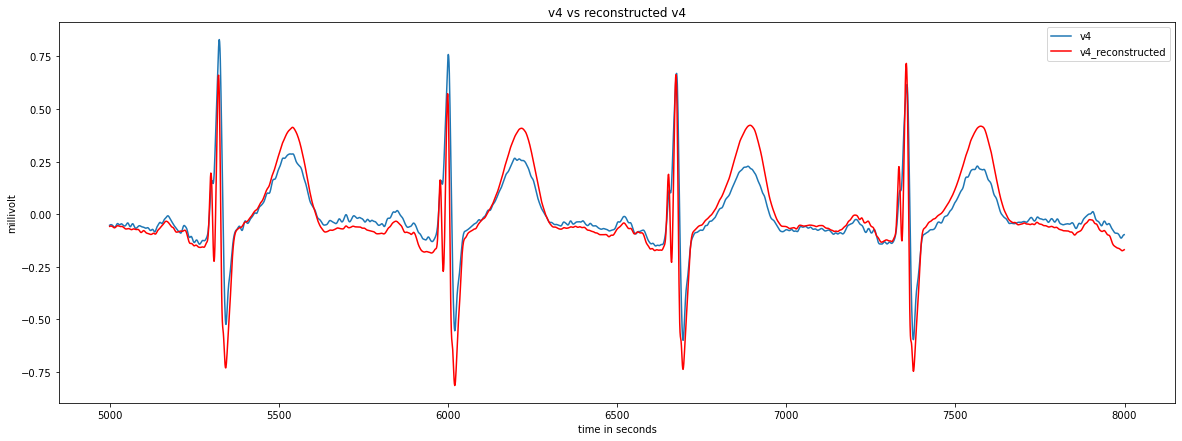

In [14]:
#v4
plt.figure(figsize=(20,7))
plt.plot(y_test['v4'][5000:8000],label="v4")
plt.plot(y_pred['v4_pred'][5000:8000],'r',label='v4_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v4 vs reconstructed v4')
plt.legend()

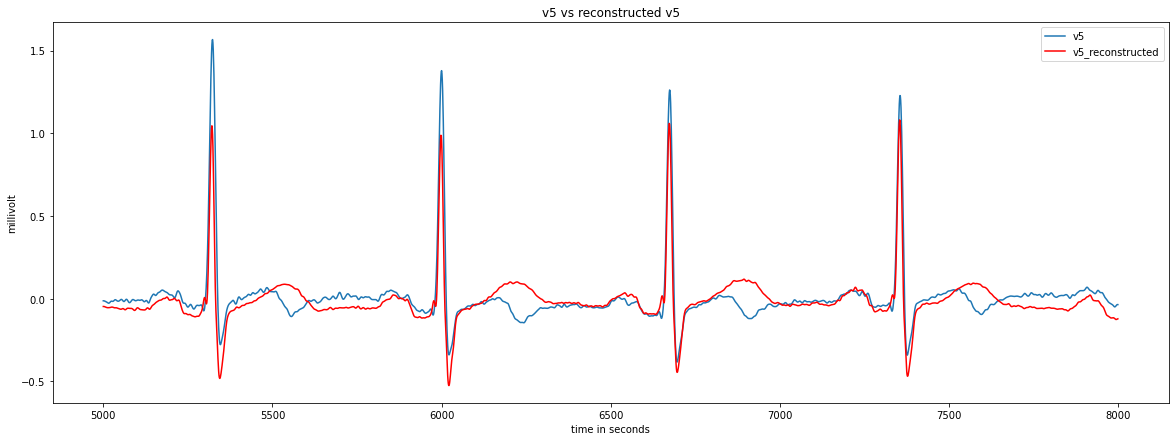

In [15]:
#v5
plt.figure(figsize=(20,7))
plt.plot(y_test['v5'][5000:8000],label="v5")
plt.plot(y_pred['v5_pred'][5000:8000],'r',label='v5_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v5 vs reconstructed v5')
plt.legend()

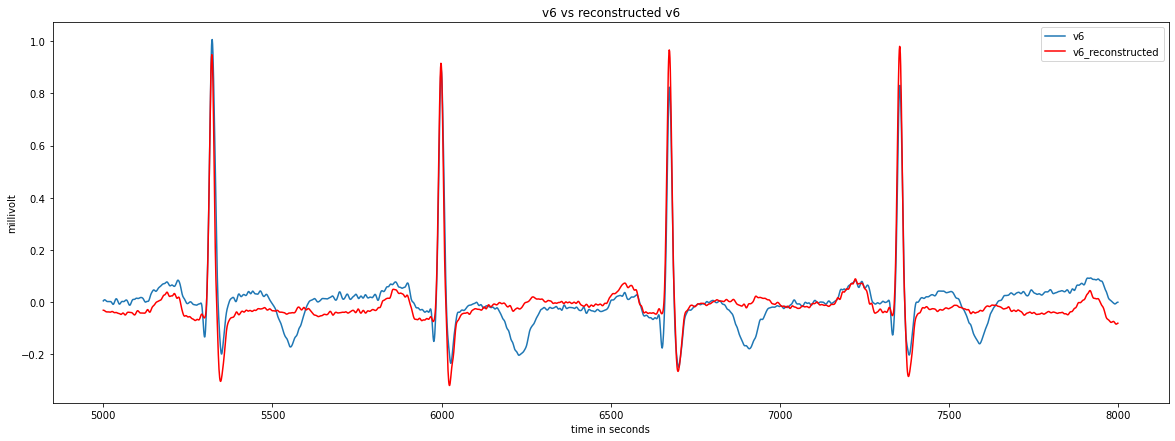

In [16]:
#v6
plt.figure(figsize=(20,7))
plt.plot(y_test['v6'][5000:8000],label="v6")
plt.plot(y_pred['v6_pred'][5000:8000],'r',label='v6_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v6 vs reconstructed v6')
plt.legend()

### **ANN Metrics on Train set**

Here we will make prediction on train set (instead of test set) to see the performance of the model on train set data.

In [31]:
model = MLPRegressor(hidden_layer_sizes=(15,), activation='logistic').fit(x_train,y_train)
y_pred=model.predict(x_train)
y_pred=pd.DataFrame(y_pred,columns=['v1_pred','v3_pred','v4_pred','v5_pred','v6_pred'])

In [32]:
r2_v1=r2_score(y_train[['v1']],y_pred[['v1_pred']])
print('R square =' ,r2_v1)
r_v1=sqrt(r2_v1)
print('correlation_coef of v1= ',r_v1)
rmse_v1=sqrt(mean_squared_error(y_train[['v1']],y_pred[['v1_pred']]))
print('rmse_v1= ',rmse_v1)

R square = 0.8715695692216816
correlation_coef of v1=  0.9335789035864519
rmse_v1=  0.07371536605059588


In [37]:
r2_v3=r2_score(y_train[['v3']],y_pred[['v3_pred']])
print('R square =' ,r2_v3)
r_v3=sqrt(r2_v3)
print('correlation_coef of v3= ',r_v3)
rmse_v3=sqrt(mean_squared_error(y_train[['v3']],y_pred[['v3_pred']]))
print('rmse_v3= ',rmse_v3)

R square = 0.8809606922064914
correlation_coef of v3=  0.9385950629565933
rmse_v3=  0.10030444611006502


In [38]:
r2_v4=r2_score(y_train[['v4']],y_pred[['v4_pred']])
print('R square =' ,r2_v4)
r_v4=sqrt(r2_v4)
print('correlation_coef of v4= ',r_v4)
rmse_v4=sqrt(mean_squared_error(y_train[['v4']],y_pred[['v4_pred']]))
print('rmse_v4= ',rmse_v4)

R square = 0.7121400537820547
correlation_coef of v4=  0.8438839101334109
rmse_v4=  0.12659552941960941


In [39]:
r2_v5=r2_score(y_train[['v5']],y_pred[['v5_pred']])
print('R square =' ,r2_v5)
r_v5=sqrt(r2_v5)
print('correlation_coef of v5= ',r_v5)
rmse_v5=sqrt(mean_squared_error(y_train[['v5']],y_pred[['v5_pred']]))
print('rmse_v5= ',rmse_v5)

R square = 0.6800155995028632
correlation_coef of v5=  0.8246305836572296
rmse_v5=  0.09535285324943342


In [40]:
r2_v6=r2_score(y_train[['v6']],y_pred[['v6_pred']])
print('R square =' ,r2_v6)
r_v6=sqrt(r2_v6)
print('correlation_coef of v6= ',r_v6)
rmse_v6=sqrt(mean_squared_error(y_train[['v6']],y_pred[['v6_pred']]))
print('rmse_v6= ',rmse_v6)

R square = 0.7485235199238313
correlation_coef of v6=  0.8651725376616107
rmse_v6=  0.06830376883148234


# **ANN by including iii and v3 as predictors**


**Creating Dataset for train data ( i,ii,iii,v1,v2,v3) and test data (v4,v5,v6)**

In [32]:
x_train=pd.read_csv('x_train_3.csv')
y_train=pd.read_csv('y_train_3.csv')
x_test=pd.read_csv('x_test_3.csv')
y_test=pd.read_csv('y_test_3.csv')


In [33]:
x_train_new=pd.concat([x_train[['i','ii','v2']],y_train[['iii','v1','v3']]],axis=1)
x_train_new

,i,ii,v2,iii,v1,v3
0,0.059091,-0.049677,0.052259,-0.109800,0.008806,0.020865
1,0.066293,-0.052948,0.048294,-0.120317,0.006531,0.018781
2,0.072327,-0.055901,0.044217,-0.129346,0.004191,0.016538
3,0.076289,-0.058298,0.039935,-0.135745,0.001736,0.014033
4,0.077742,-0.060031,0.035389,-0.138962,-0.000859,0.011245
...,...,...,...,...,...,...
2399995,0.016310,-0.079864,0.257624,-0.099366,0.058704,0.135583
2399996,0.006237,-0.085582,0.246488,-0.095010,0.054980,0.126710
2399997,-0.002097,-0.091581,0.237009,-0.092667,0.053631,0.119856
2399998,-0.007924,-0.096999,0.229297,-0.092255,0.054703,0.115141


In [34]:
y_train_new=y_train[['v4','v5','v6']]
y_train_new

,v4,v5,v6
0,-0.001003,-0.031425,-0.045720
1,-0.003726,-0.034163,-0.047625
2,-0.006406,-0.036766,-0.049445
3,-0.009009,-0.039114,-0.051129
4,-0.011506,-0.041119,-0.052688
...,...,...,...
2399995,0.028944,-0.035600,-0.071214
2399996,0.022586,-0.039259,-0.075179
2399997,0.019416,-0.040403,-0.076902
2399998,0.019543,-0.038887,-0.076161


In [35]:
x_test_new=pd.concat([x_test[['i','ii','v2']],y_test[['iii','v1','v3']]],axis=1)
x_test_new

,i,ii,v2,iii,v1,v3
0,-0.028925,0.093669,-0.108403,0.116164,-0.029438,-0.082027
1,-0.019101,0.107135,-0.093574,0.119687,-0.044847,-0.065392
2,-0.009049,0.121814,-0.078456,0.124200,-0.060703,-0.048238
3,0.001363,0.138575,-0.062818,0.130449,-0.077202,-0.030193
4,0.012087,0.157683,-0.046544,0.138749,-0.094126,-0.011143
...,...,...,...,...,...,...
599995,-0.071941,-0.122982,-0.096969,-0.046266,-0.009096,-0.165192
599996,-0.072800,-0.124247,-0.098495,-0.046622,-0.009847,-0.167552
599997,-0.073780,-0.124088,-0.100305,-0.045457,-0.010618,-0.169943
599998,-0.074858,-0.122511,-0.102141,-0.042800,-0.011298,-0.171951


In [36]:
y_test_new=y_test[['v4','v5','v6']]
y_test_new

,v4,v5,v6
0,-0.068431,-0.029733,-0.003349
1,-0.056687,-0.020393,0.007857
2,-0.043725,-0.009981,0.019319
3,-0.028662,0.002287,0.031176
4,-0.011190,0.016702,0.043375
...,...,...,...
599995,-0.213824,-0.149072,-0.080498
599996,-0.215109,-0.149668,-0.081404
599997,-0.216282,-0.149905,-0.082291
599998,-0.217007,-0.149772,-0.083113


Running ANN 5 times on new dataset where x consists of i,ii,iii,v1,v2,v3 and y consists of v4,v5,v6 only


In [37]:
# Running ANN for 5 times on x_train_new,y_train_new,x_test_new,y_test_new....they are new data where x_train and x_test  
#consist of i,ii,iii,v1,v2,v3 and y_train and y_test  consist of v4,v5,v6 only
#Running for 5 random number


v4_correlation_all = []
v5_correlation_all = []
v6_correlation_all = []

v4_rmse_all=[]
v5_rmse_all=[]
v6_rmse_all=[]

for i in range(0,5):
            model = MLPRegressor(random_state=i,hidden_layer_sizes=(15,), activation='logistic').fit(x_train_new, y_train_new)
            y_pred=model.predict(x_test_new)
            y_pred=pd.DataFrame(y_pred,columns=['v4_pred','v5_pred','v6_pred'])

            r_v4=sqrt(r2_score(y_test_new[['v4']],y_pred[['v4_pred']]))
            rmse_v4=sqrt(mean_squared_error(y_test_new[['v4']],y_pred[['v4_pred']]))
            v4_correlation_all.append(r_v4)
            v4_rmse_all.append(rmse_v4)


            r_v5=sqrt(r2_score(y_test_new[['v5']],y_pred[['v5_pred']]))
            rmse_v5=sqrt(mean_squared_error(y_test_new[['v5']],y_pred[['v5_pred']]))
            v5_correlation_all.append(r_v5)
            v5_rmse_all.append(rmse_v5)

            r_v6=sqrt(r2_score(y_test[['v6']],y_pred[['v6_pred']]))
            rmse_v6=sqrt(mean_squared_error(y_test_new[['v6']],y_pred[['v6_pred']]))
            v6_correlation_all.append(r_v6)
            v6_rmse_all.append(rmse_v6)

v4_corr=round(mean(v4_correlation_all),3)
v5_corr=round(mean(v5_correlation_all),3)
v6_corr=round(mean(v6_correlation_all),3)

#v1_rmse=round(mean(v1_rmse_all),3)
#v3_rmse=round(mean(v3_rmse_all),3)
v4_rmse=round(mean(v4_rmse_all),3)
v5_rmse=round(mean(v5_rmse_all),3)
v6_rmse=round(mean(v6_rmse_all),3)

In [39]:
v4_corr

0.91

In [40]:
v4_correlation_all

[0.91141777626924,
 0.9153178042892811,
 0.90919254039244,
 0.906354116418699,
 0.9082978044072239]

In [41]:
v5_corr

0.872

In [42]:
v6_corr

0.889

In [43]:
v4_rmse

0.094

In [44]:
v5_rmse

0.09

In [45]:
v6_rmse

0.069

## **Linear Regression**


In [46]:
x_train=pd.read_csv('x_train_3.csv')
y_train=pd.read_csv('y_train_3.csv')
x_test=pd.read_csv('x_test_3.csv')
y_test=pd.read_csv('y_test_3.csv')

In [47]:
x_train = x_train[['i','ii','v2']]
y_train = y_train[['v1','v3','v4','v5','v6']]
x_test = x_test[['i','ii','v2']]
y_test = y_test[['v1','v3','v4','v5','v6']]

In [48]:
y_train

,v1,v3,v4,v5,v6
0,0.008806,0.020865,-0.001003,-0.031425,-0.045720
1,0.006531,0.018781,-0.003726,-0.034163,-0.047625
2,0.004191,0.016538,-0.006406,-0.036766,-0.049445
3,0.001736,0.014033,-0.009009,-0.039114,-0.051129
4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688
...,...,...,...,...,...
2399995,0.058704,0.135583,0.028944,-0.035600,-0.071214
2399996,0.054980,0.126710,0.022586,-0.039259,-0.075179
2399997,0.053631,0.119856,0.019416,-0.040403,-0.076902
2399998,0.054703,0.115141,0.019543,-0.038887,-0.076161


In [49]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred_result=LR.predict(x_test)
y_pred_result

array([[-0.04259084, -0.07169156, -0.00909517,  0.04194932,  0.05043264],
       [-0.04199999, -0.04968555,  0.01418142,  0.05966907,  0.06281185],
       [-0.04147812, -0.02686309,  0.03862504,  0.07849141,  0.07605549],
       ...,
       [ 0.00251498, -0.16376985, -0.18506712, -0.14941657, -0.10809871],
       [ 0.00215812, -0.16517019, -0.18550886, -0.14901853, -0.10749802],
       [ 0.00185839, -0.16591644, -0.18496039, -0.14766649, -0.10614076]])

In [51]:
y_pred=pd.DataFrame(y_pred_result,columns=['v1_pred','v3_pred','v4_pred','v5_pred','v6_pred'])
y_pred

,v1_pred,v3_pred,v4_pred,v5_pred,v6_pred
0,-0.042591,-0.071692,-0.009095,0.041949,0.050433
1,-0.042000,-0.049686,0.014181,0.059669,0.062812
2,-0.041478,-0.026863,0.038625,0.078491,0.076055
3,-0.041043,-0.002628,0.065070,0.099193,0.090769
4,-0.040624,0.023218,0.093758,0.121974,0.107100
...,...,...,...,...,...
599995,0.002995,-0.159692,-0.181416,-0.147118,-0.106702
599996,0.002833,-0.161863,-0.183650,-0.148769,-0.107834
599997,0.002515,-0.163770,-0.185067,-0.149417,-0.108099
599998,0.002158,-0.165170,-0.185509,-0.149019,-0.107498


In [52]:
from math import sqrt
r_v1=sqrt(r2_score(y_test[['v1']],y_pred[['v1_pred']]))
rmse_v1=sqrt(mean_squared_error(y_test[['v1']],y_pred[['v1_pred']]))
print('v1_coeff: ',r_v1)
print('v1_rmse: ', rmse_v1)

v1_coeff:  0.9015122493348434
v1_rmse:  0.0931525697497107


In [53]:
r_v3=sqrt(r2_score(y_test[['v3']],y_pred[['v3_pred']]))
rmse_v3=sqrt(mean_squared_error(y_test[['v3']],y_pred[['v3_pred']]))
print('v3_coeff: ',r_v3)
print('v3_rmse: ', rmse_v3)

v3_coeff:  0.9374420685611171
v3_rmse:  0.10182082668019983


In [54]:
r_v4=sqrt(r2_score(y_test[['v4']],y_pred[['v4_pred']]))
rmse_v4=sqrt(mean_squared_error(y_test[['v4']],y_pred[['v4_pred']]))
print('v4_coeff: ',r_v4)
print('v4_rmse: ', rmse_v4)

v4_coeff:  0.7457270205002058
v4_rmse:  0.15182314116497683


In [55]:
r_v5=sqrt(r2_score(y_test[['v5']],y_pred[['v5_pred']]))
rmse_v5=sqrt(mean_squared_error(y_test[['v5']],y_pred[['v5_pred']]))
print('v5_coeff: ',r_v5)
print('v5_rmse: ', rmse_v5)

v5_coeff:  0.814468819744899
v5_rmse:  0.10664306386982458


In [56]:
r_v6=sqrt(r2_score(y_test[['v6']],y_pred[['v6_pred']]))
rmse_v6=sqrt(mean_squared_error(y_test[['v6']],y_pred[['v6_pred']]))
print('v6_coeff: ',r_v6)
print('v6_rmse: ', rmse_v6)

v6_coeff:  0.8721972994046681
v6_rmse:  0.07385700826563782


# Visualization for Linear Regression

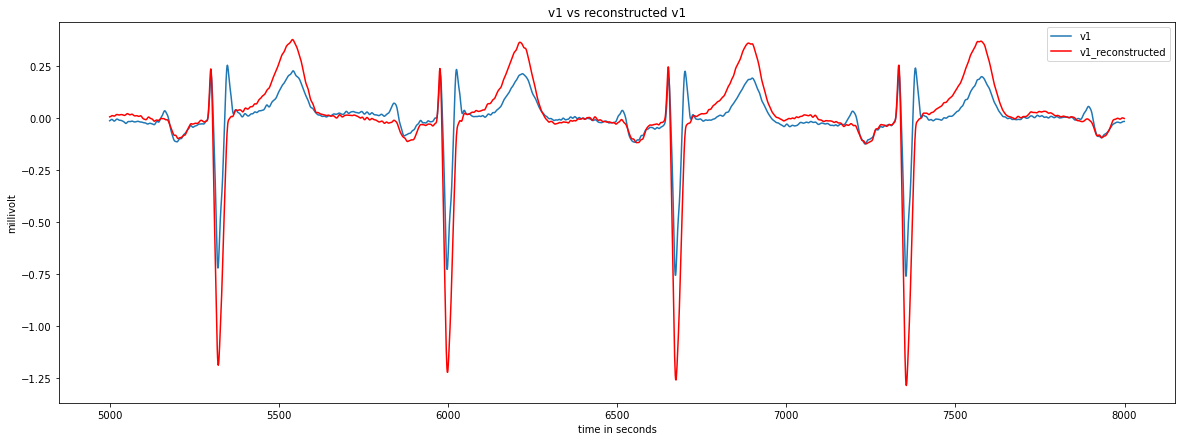

In [57]:
#v1
plt.figure(figsize=(20,7))
plt.plot(y_test['v1'][5000:8000],label="v1")
plt.plot(y_pred['v1_pred'][5000:8000],'r',label='v1_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v1 vs reconstructed v1')
plt.legend()

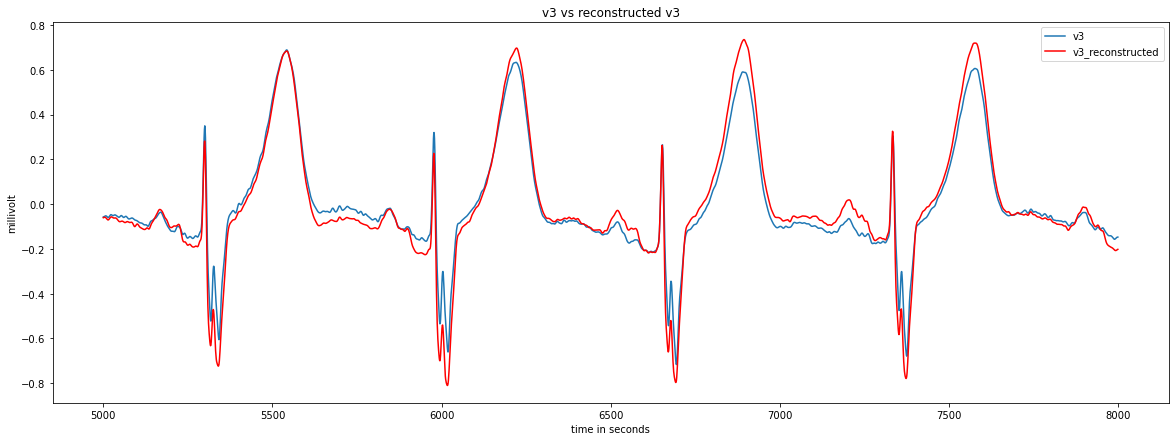

In [58]:
#v3
plt.figure(figsize=(20,7))
plt.plot(y_test['v3'][5000:8000],label="v3")
plt.plot(y_pred['v3_pred'][5000:8000],'r',label='v3_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v3 vs reconstructed v3')
plt.legend()

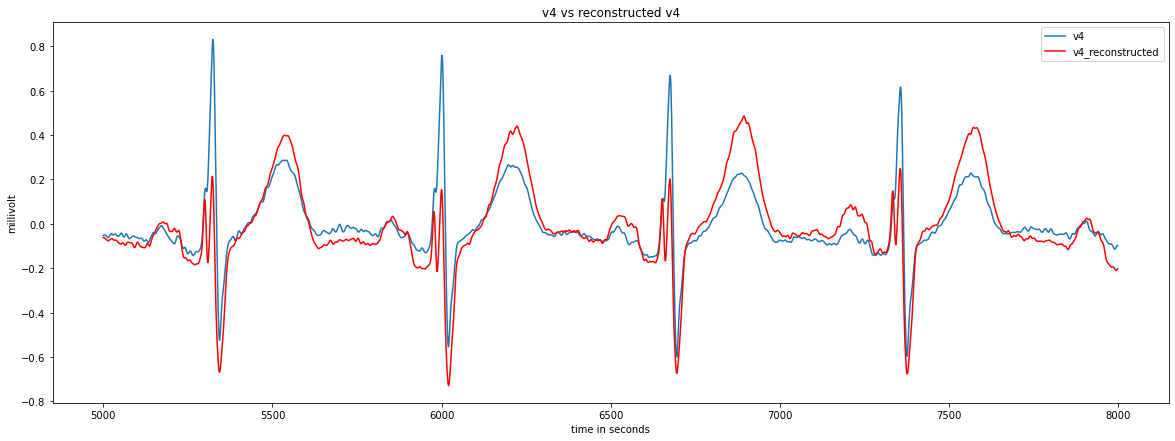

In [59]:
plt.figure(figsize=(20,7))
plt.plot(y_test['v4'][5000:8000],label="v4")
plt.plot(y_pred['v4_pred'][5000:8000],'r',label='v4_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v4 vs reconstructed v4')
plt.legend()

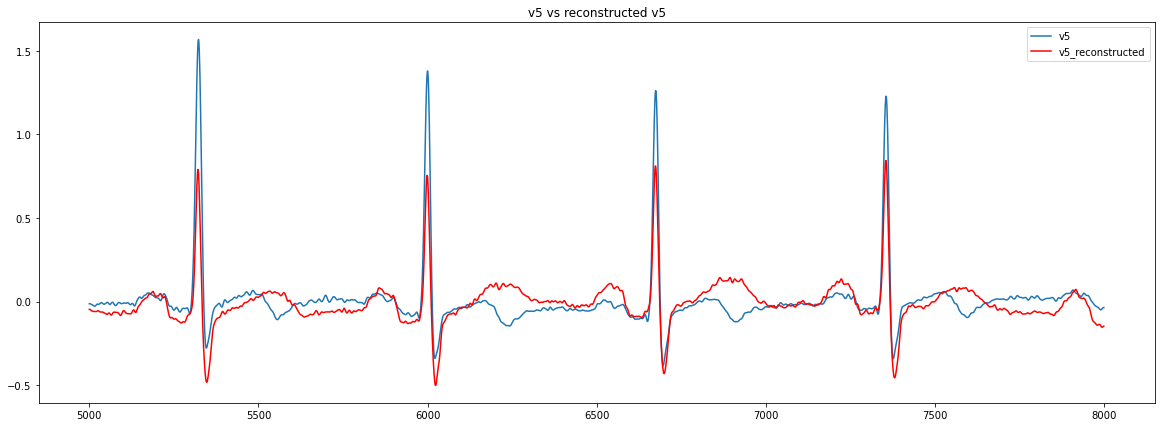

In [60]:
plt.figure(figsize=(20,7))
plt.plot(y_test['v5'][5000:8000],label="v5")
plt.plot(y_pred['v5_pred'][5000:8000],'r',label='v5_reconstructed')
#plt.xlabel('time in seconds')
#plt.ylabel('millivolt')
plt.title('v5 vs reconstructed v5')
plt.legend()

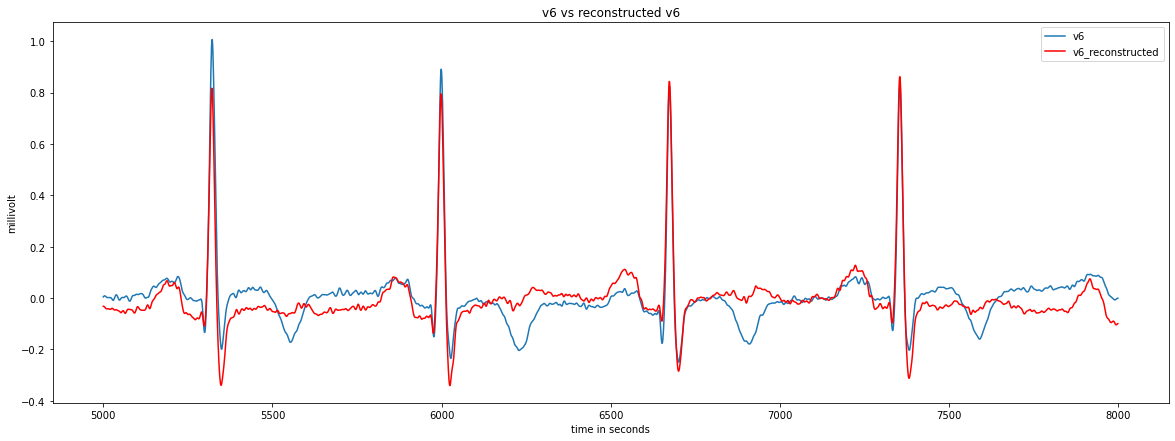

In [61]:
plt.figure(figsize=(20,7))
plt.plot(y_test['v6'][5000:8000],label="v6")
plt.plot(y_pred['v6_pred'][5000:8000],'r',label='v6_reconstructed')
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('v6 vs reconstructed v6')
plt.legend()

## LR Metrics on Train set

In [62]:
y_pred=LR.predict(x_train)
y_pred=pd.DataFrame(y_pred,columns=['v1_pred','v3_pred','v4_pred','v5_pred','v6_pred'])
y_pred

,v1_pred,v3_pred,v4_pred,v5_pred,v6_pred
0,-0.007102,0.046830,0.022609,-0.000368,-0.008270
1,-0.013347,0.044027,0.021306,0.000271,-0.007199
2,-0.018946,0.040897,0.019613,0.000531,-0.006418
3,-0.023405,0.037174,0.017221,0.000115,-0.006154
4,-0.026489,0.032715,0.013964,-0.001130,-0.006523
...,...,...,...,...,...
2399995,0.124736,0.212210,0.101222,-0.016462,-0.051293
2399996,0.125686,0.196612,0.085675,-0.027759,-0.058922
2399997,0.126416,0.182959,0.071728,-0.038129,-0.066037
2399998,0.126455,0.171926,0.060441,-0.046486,-0.071766


In [63]:
r2_v1=r2_score(y_train[['v1']],y_pred[['v1_pred']])
print('R square =' ,r2_v1)
r_v1=sqrt(r2_v1)
print('correlation_coef of v1= ',r_v1)
rmse_v1=sqrt(mean_squared_error(y_train[['v1']],y_pred[['v1_pred']]))
print('rmse_v1= ',rmse_v1)

R square = 0.8679441808392503
correlation_coef of v1=  0.9316352187628215
rmse_v1=  0.07474855966249422


In [64]:
r2_v3=r2_score(y_train[['v3']],y_pred[['v3_pred']])
print('R square =' ,r2_v3)
r_v3=sqrt(r2_v3)
print('correlation_coef of v3= ',r_v3)
rmse_v3=sqrt(mean_squared_error(y_train[['v3']],y_pred[['v3_pred']]))
print('rmse_v3= ',rmse_v3)

R square = 0.8656166343256064
correlation_coef of v3=  0.9303852074950496
rmse_v3=  0.10657313579922888


In [65]:
r2_v4=r2_score(y_train[['v4']],y_pred[['v4_pred']])
print('R square =' ,r2_v4)
r_v4=sqrt(r2_v4)
print('correlation_coef of v4= ',r_v4)
rmse_v4=sqrt(mean_squared_error(y_train[['v4']],y_pred[['v4_pred']]))
print('rmse_v4= ',rmse_v4)

R square = 0.6528489751068032
correlation_coef of v4=  0.8079907023640824
rmse_v4=  0.13902310219965497


In [66]:
r2_v5=r2_score(y_train[['v5']],y_pred[['v5_pred']])
print('R square =' ,r2_v5)
r_v5=sqrt(r2_v5)
print('correlation_coef of v5= ',r_v5)
rmse_v5=sqrt(mean_squared_error(y_train[['v5']],y_pred[['v5_pred']]))
print('rmse_v5= ',rmse_v5)


R square = 0.6216768275055751
correlation_coef of v5=  0.7884648549590368
rmse_v5=  0.10368137811288597


In [67]:
r2_v6=r2_score(y_train[['v6']],y_pred[['v6_pred']])
print('R square =' ,r2_v6)
r_v6=sqrt(r2_v6)
print('correlation_coef of v6= ',r_v6)
rmse_v6=sqrt(mean_squared_error(y_train[['v6']],y_pred[['v6_pred']]))
print('rmse_v6= ',rmse_v6)

R square = 0.7136640160951131
correlation_coef of v6=  0.84478637305245
rmse_v6=  0.07288429308410656
